In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
dataset_names = {"agnews": "AG News", "imdb": "IMDb", "jigsaw": "Jigsaw"}
strategy_names = {"NewOnlyStrategy": "New only", "RetrainStrategy": "Retrain", "FineTuneStrategy": "Fine tuning",
                  "DeltaF1Strategy": "HybridAL"}

In [3]:
with open('result_example.json', 'r') as f:
    data = json.load(f)
data

{'cfg': {'seed': 42,
  'total_rounds': -1,
  'initial_pool_size': 200,
  'acquisition_batch_size': 32,
  'min_rounds_before_plateau': 10,
  'plateau_patience': 5,
  'plateau_f1_threshold': 0.001,
  'pool_proportion_threshold': 0.2,
  'sampler_class': 'EntropyOnRandomSubsetSampler',
  'sampler_kwargs': {'random_subset_size': 5000},
  'strategy_class': 'DeltaF1Strategy',
  'strategy_kwargs': {'epsilon': 0.05, 'k': 2},
  'model_name_or_path': 'distilbert-base-uncased',
  'num_labels': 4,
  'tokenizer_kwargs': {'max_length': 128,
   'padding': 'max_length',
   'truncation': True,
   'add_special_tokens': True,
   'return_tensors': 'pt'},
  'optimizer_class': 'Adam',
  'optimizer_kwargs': {'lr': 2e-05, 'weight_decay': 0.001},
  'criterion_class': 'CrossEntropyLoss',
  'criterion_kwargs': {},
  'scheduler_class': 'StepLR',
  'scheduler_kwargs': {'step_size': 10, 'gamma': 0.1},
  'device': 'cuda',
  'epochs': 5,
  'batch_size': 16,
  'data': 'agnews',
  'save_dir': 'experiments',
  'experimen

In [4]:
def plot_f1_vs_time(results_paths: list, save_path: str, cmap='tab20b'):
    """
    Plots test set F1 score vs training time for different experiments.

    Parameters:
    - results_paths: List of file paths containing results for each experiment in .json format.
    - save_path: Path to save the generated plot.
    """

    plt.figure(figsize=(6, 4))

    for i, path in enumerate(results_paths):
        with open(path, 'r') as f:
            data = json.load(f)
        strat = data['cfg']['strategy_class']
        dataset = data['cfg']['data']

        round_val_stats = data['round_val_stats']

        overall_time = 0
        times, f1_scores = [], []
        for round in round_val_stats:
            overall_time += round['training_time']
            times.append(overall_time)
            f1_scores.append(round['f1_score'])

        label = f"{dataset_names[dataset]}/{strategy_names[strat]}"
        color = plt.get_cmap(cmap)(i / 20)

        plt.plot(times, f1_scores, marker='o', label=label, color=color)

    plt.xlabel('Training Time (seconds)')
    plt.ylabel('Test Set Macro-F1 Score')
    plt.title('Test Set Macro-F1 Score vs Training Time')
    plt.legend()
    plt.show()
    # plt.savefig(save_path)
    # plt.close()

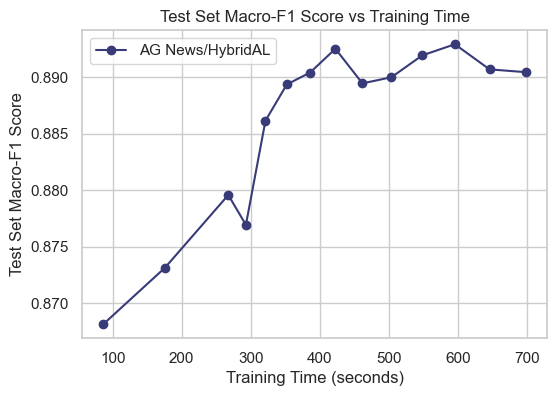

In [5]:
plot_f1_vs_time(['result_example.json'], 'f1_vs_time.png')